#### Name Surname:
#### StudentID:

#### Important Notes: 
Change this file name to **studentId_LabWork7.ipynb**. After finished your work, upload your file to the related field in LMS

### LabWork7 - Regression

- Perform Simple Linear Regression, Multiple Linear Regression and Polynomial Regression on your dataset.
- Explain each step detailed:
    - Explain the selected evaluation metric.
    - Split data as train and test set. Split your data multiple times for different seed values.
    - Show the relation between selected features and target feature using scatter plot. Draw multiple plots.
- Apply necessary feature engineering  methods
- Explain the obtained results: 
    - Which method gives better performance? Why?
- If your problem is not a regression problem you can select any real-valued column and use this column as a label.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set()
%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)


In [114]:
#önceki haftaların dataları

df = fileDir = "../../week5/Lab/output_bank_DataFrame.csv"
df = pd.read_csv(fileDir)

In [115]:
df.sample(n=5, random_state=21)

age         job   marital  education default      balance housing  \
8274  30.000000  technician       NaN  secondary      no  -306.000000     yes   
3553  41.199408      admin.    single  secondary      no   726.000000     yes   
8698  47.000000  unemployed   married    primary      no  2946.000000      no   
623   49.000000         NaN  divorced        NaN     yes  1547.403549     yes   
9098  31.000000  management    single   tertiary      no   518.000000     yes   

     loan   contact  day month  duration  campaign  pdays  previous poutcome  \
8274  yes  cellular   18   nov       372       1.0  186.0       1.0  failure   
3553   no  cellular   24   may       699       1.0  378.0       9.0      NaN   
8698   no   unknown    5   jun        60       1.0   -1.0       0.0  unknown   
623    no  cellular   30   jul       988       2.0   -1.0       0.0  unknown   
9098   no  cellular   18   may       399       1.0   -1.0       0.0      NaN   

     deposit  
8274      no  
3553     yes  
8698      no  
623      yes  
9098      no

In [116]:
df.describe().T

count         mean          std     min    25%          50%  \
age       11162.0    41.199408    10.494467    18.0   34.0    41.199408   
balance   11162.0  1547.403549  2918.019762 -6847.0  234.0  1167.000000   
day       11162.0    15.658036     8.420740     1.0    8.0    15.000000   
duration  11162.0   371.993818   347.128386     2.0  138.0   255.000000   
campaign  11162.0     2.506903     2.593378     1.0    1.0     2.000000   
pdays     11162.0    50.908677   101.960097    -1.0   -1.0    -1.000000   
previous  11162.0     0.833008     2.208773     0.0    0.0     0.000000   

                  75%      max  
age         46.000000     95.0  
balance   1547.403549  81204.0  
day         22.000000     31.0  
duration   496.000000   3881.0  
campaign     3.000000     63.0  
pdays       50.908677    854.0  
previous     0.833008     58.0

In [117]:
df = df.drop('job',axis=1) #job str olduğu için drop edildi

In [118]:
print(df['marital'].unique())

# 'marital' sütunundaki benzersiz değerleri faktörize edelim
factorized_values, unique_values = pd.factorize(df['marital'])

# Yeni bir sütun oluşturalım ve faktörize edilmiş değerleri atayalım
df['marital'] = factorized_values

df['marital']

[nan 'married' 'single' 'divorced']


0       -1
1        0
2        0
3        0
4        0
        ..
11157    1
11158    0
11159    1
11160    0
11161    0
Name: marital, Length: 11162, dtype: int64

In [119]:
print(df['education'].unique())

mapping = {'secondary': 0, 'tertiary': 1, 'primary': 2, 'unknown': -1}

# 'education' sütunundaki benzersiz değerleri faktörize edelim ve mapping'i kullanarak sayısal değerler atayalım
df['education'] = df['education'].replace(mapping)

# Yeni bir sütun oluşturalım ve faktörize edilmiş değerleri atayalım
df['education'] = factorized_values
df['education']

['secondary' nan 'tertiary' 'primary' 'unknown']


0       -1
1        0
2        0
3        0
4        0
        ..
11157    1
11158    0
11159    1
11160    0
11161    0
Name: education, Length: 11162, dtype: int64

In [120]:
print(df['month'].unique())

# Hangi değere hangi sayının atanacağını belirleyelim
mapping = {'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'sep': 9}

# 'month' sütunundaki değerleri mapping'e göre değiştirerek yeni bir sütun oluşturalım
df['month'] = df['month'].replace(mapping)

print(df['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 5  6  7  8 10 11 12  1  2  3  4  9]


In [121]:
print(df['deposit'].unique())

# 'yes' ve 'no' değerlerini True ve False olarak replace edelim
df['deposit'] = df['deposit'].replace({'yes': True, 'no': False})

df['deposit']

['yes' 'no']


0         True
1         True
2         True
3         True
4         True
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: deposit, Length: 11162, dtype: bool

In [122]:
df = df.drop('contact',axis=1)
df = df.drop('poutcome',axis=1)
df = df.drop('loan',axis=1)
df = df.drop('housing',axis=1)
df = df.drop('default',axis=1)

In [123]:
mean_balance = df['balance'].mean()
std_balance = df['balance'].std()
threshold = 2  # Standart sapma 2 #aykırı değerler filtrelendi

# Aykırı değerleri filtreleme
df = df[(df['balance'] >= mean_balance - threshold * std_balance) & (df['balance'] <= mean_balance + threshold * std_balance)]

print(df['balance'])

0        2343.000000
1          45.000000
2        1270.000000
3        2476.000000
4         184.000000
            ...     
11157    1547.403549
11158    1547.403549
11159      29.000000
11160       0.000000
11161    1547.403549
Name: balance, Length: 10857, dtype: float64


In [124]:
df.sample(n=5, random_state=21)

age  marital  education      balance  day  month  duration  \
9168   55.000000       -1         -1  1393.000000   21     11        55   
10957  25.000000        1          1  3090.000000   21      8       139   
11133  41.199408        0          0  1594.000000   17      4       110   
1498   52.000000        1          1  1547.403549   16      4       583   
7428   58.000000       -1         -1   269.000000   16      5        38   

       campaign  pdays  previous  deposit  
9168        5.0   -1.0       0.0    False  
10957       1.0   -1.0       0.0    False  
11133       1.0  260.0       5.0    False  
1498        1.0  147.0       1.0     True  
7428        2.0   -1.0       0.0    False

In [125]:
corrDf = df.corr()
corrDf

age   marital  education   balance       day     month  \
age        1.000000 -0.074382  -0.074382  0.073138  0.000977  0.061921   
marital   -0.074382  1.000000   1.000000 -0.021739  0.003353 -0.025985   
education -0.074382  1.000000   1.000000 -0.021739  0.003353 -0.025985   
balance    0.073138 -0.021739  -0.021739  1.000000  0.011303  0.065592   
day        0.000977  0.003353   0.003353  0.011303  1.000000  0.058796   
month      0.061921 -0.025985  -0.025985  0.065592  0.058796  1.000000   
duration  -0.002544  0.024811   0.024811  0.041660 -0.017635  0.006526   
campaign   0.001067 -0.031690  -0.031690 -0.032187  0.132337  0.041295   
pdays     -0.002250  0.001558   0.001558  0.017410 -0.077421 -0.035511   
previous   0.003991 -0.003008  -0.003008  0.046188 -0.054474 -0.002826   
deposit    0.025704  0.032923   0.032923  0.101847 -0.056387  0.031525   

           duration  campaign     pdays  previous   deposit  
age       -0.002544  0.001067 -0.002250  0.003991  0.025704  
marital    0.024811 -0.031690  0.001558 -0.003008  0.032923  
education  0.024811 -0.031690  0.001558 -0.003008  0.032923  
balance    0.041660 -0.032187  0.017410  0.046188  0.101847  
day       -0.017635  0.132337 -0.077421 -0.054474 -0.056387  
month      0.006526  0.041295 -0.035511 -0.002826  0.031525  
duration   1.000000 -0.042486 -0.027611 -0.024290  0.453153  
campaign  -0.042486  1.000000 -0.094996 -0.044719 -0.123270  
pdays     -0.027611 -0.094996  1.000000  0.464861  0.139583  
previous  -0.024290 -0.044719  0.464861  1.000000  0.135261  
deposit    0.453153 -0.123270  0.139583  0.135261  1.000000

<Axes: >

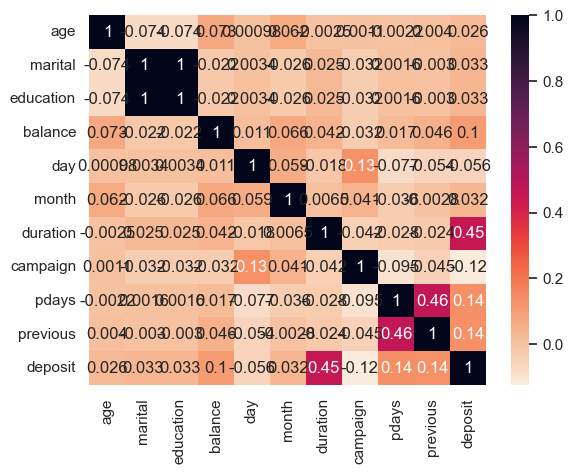

In [126]:
sns.heatmap(corrDf, xticklabels=corrDf.columns, yticklabels=corrDf.columns, 
            annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

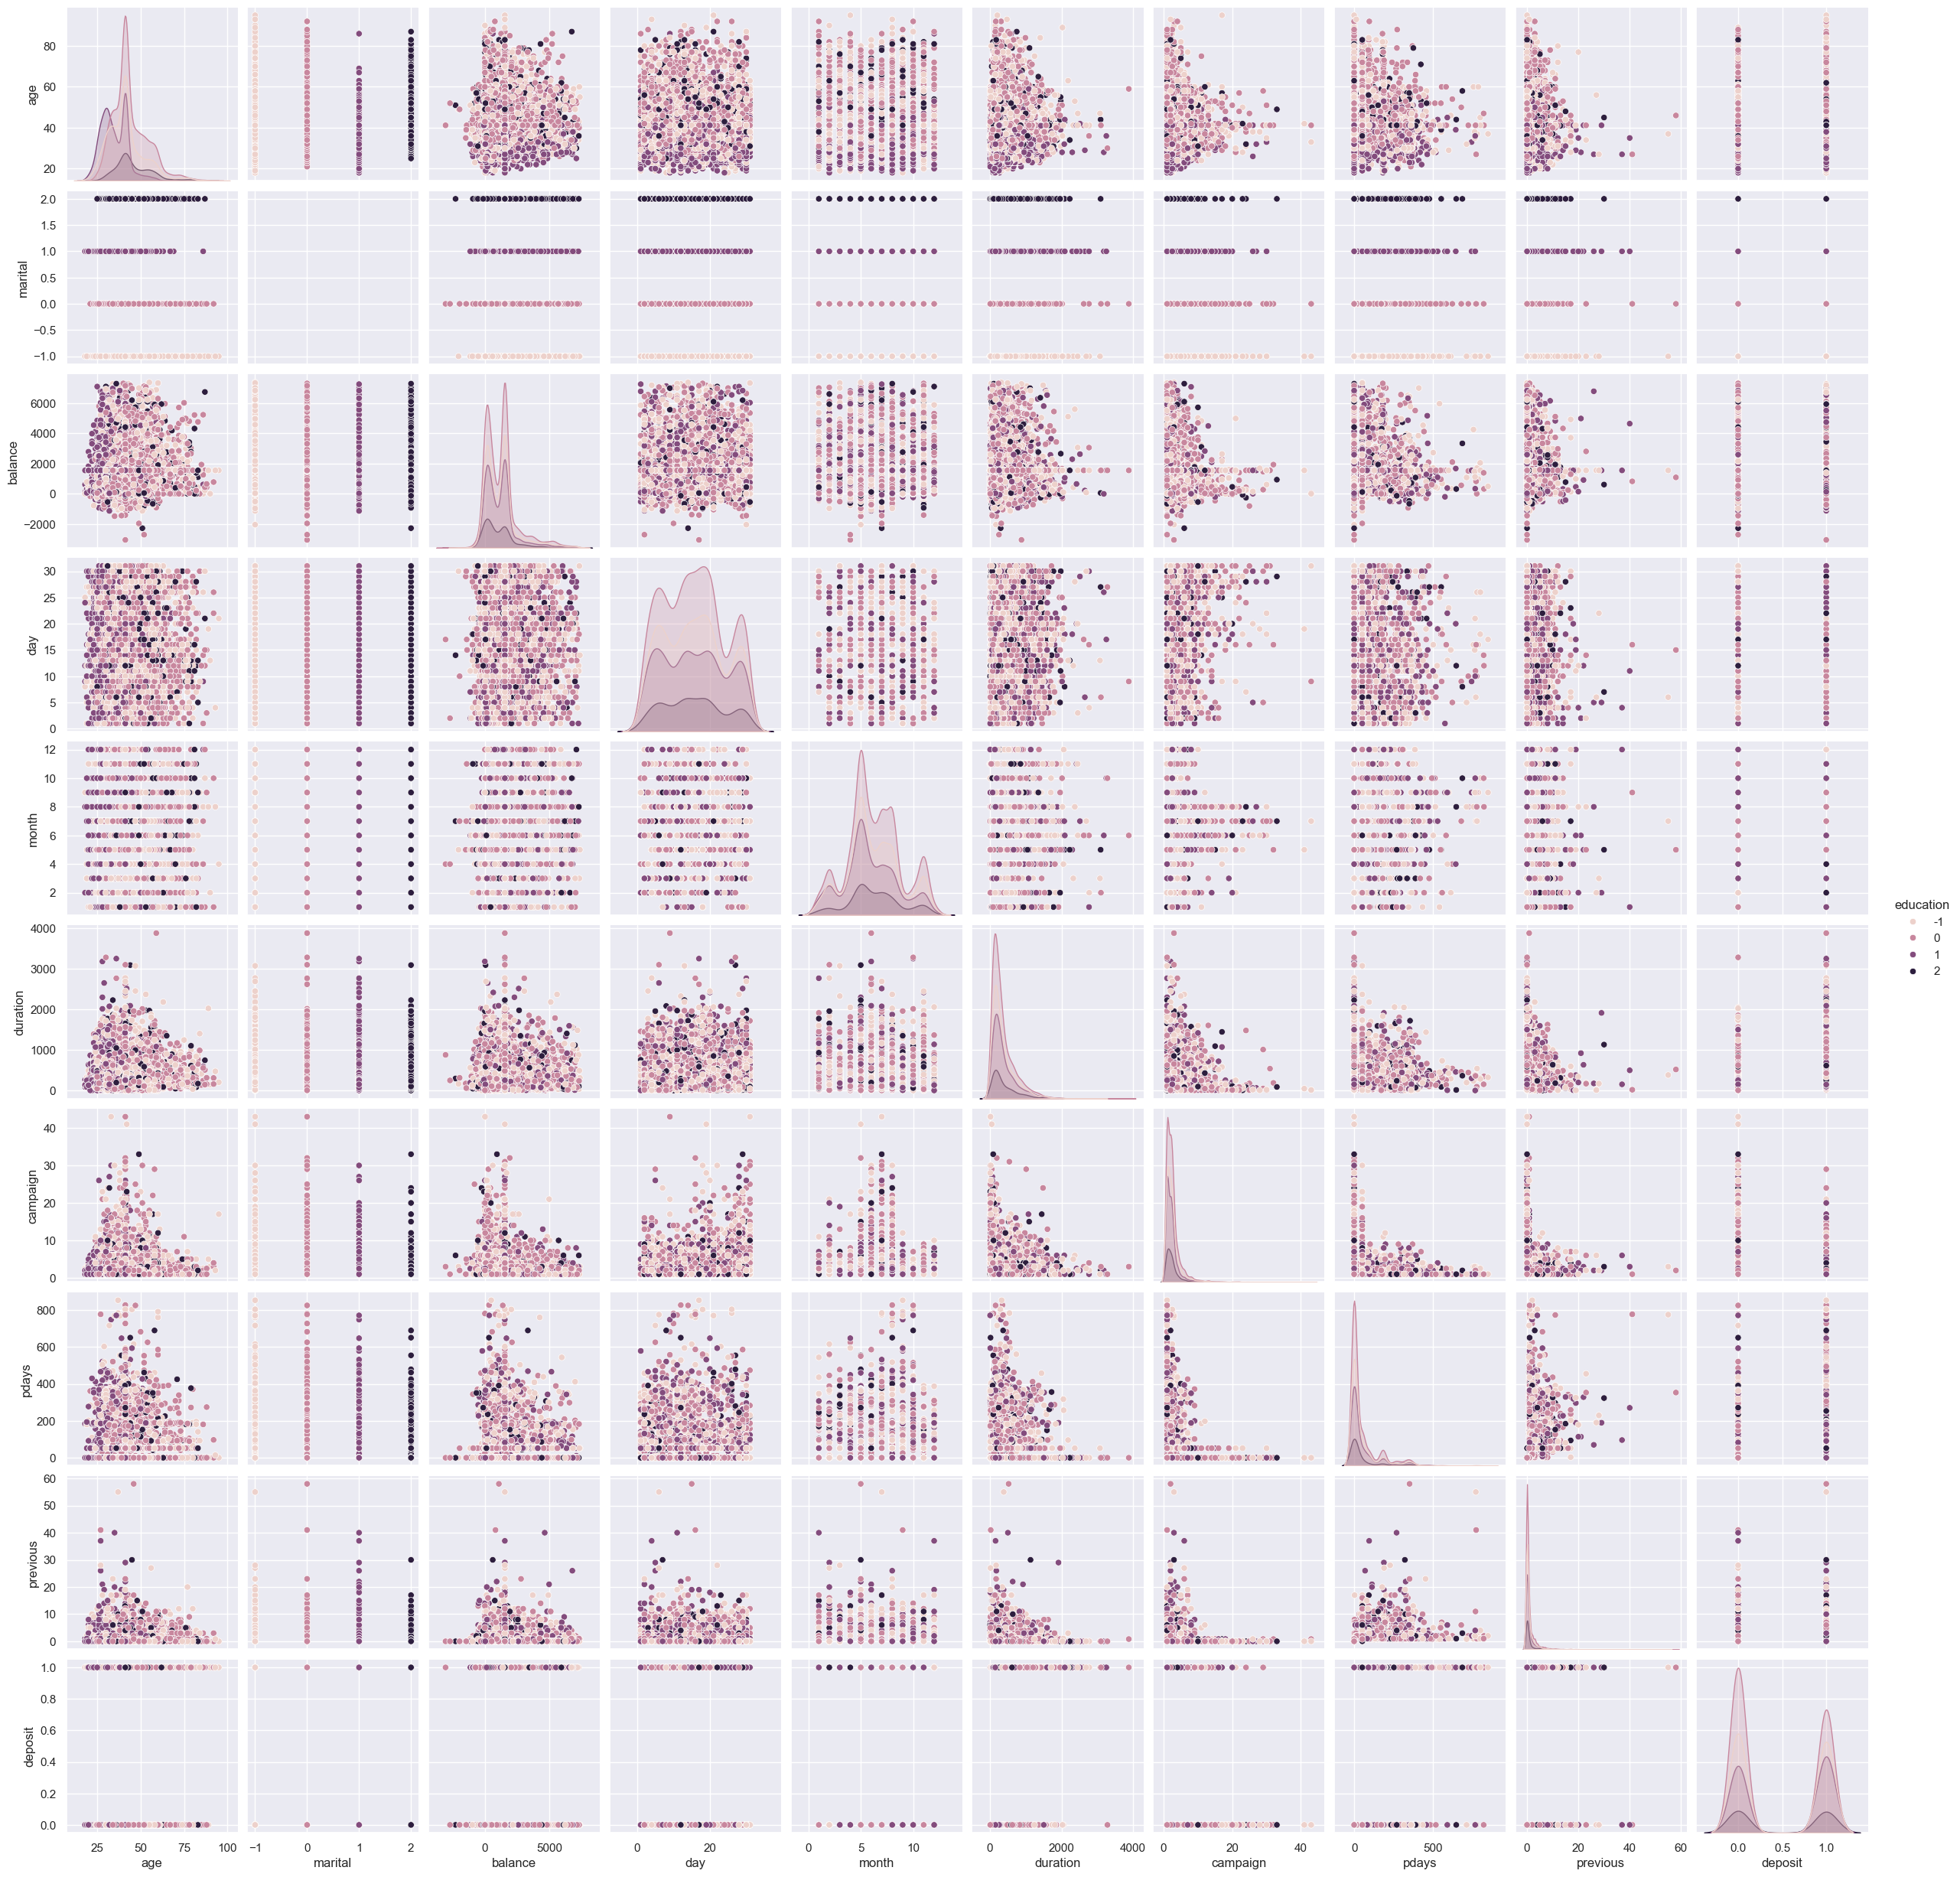

In [127]:
sns.pairplot(data=df, hue='education')

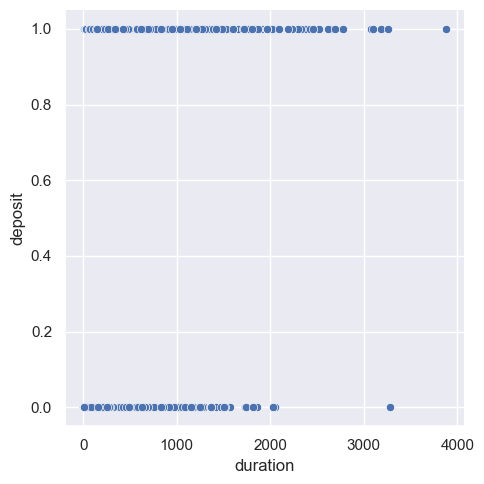

In [128]:
sns.relplot(data=df, x='duration',y='deposit',kind='scatter') #NO

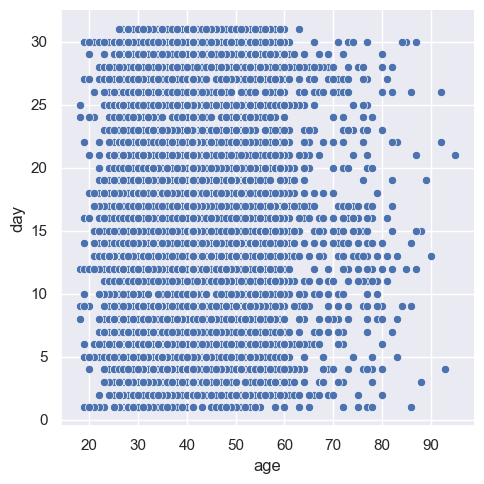

In [129]:
sns.relplot(data=df, x='age',y='day',kind='scatter')

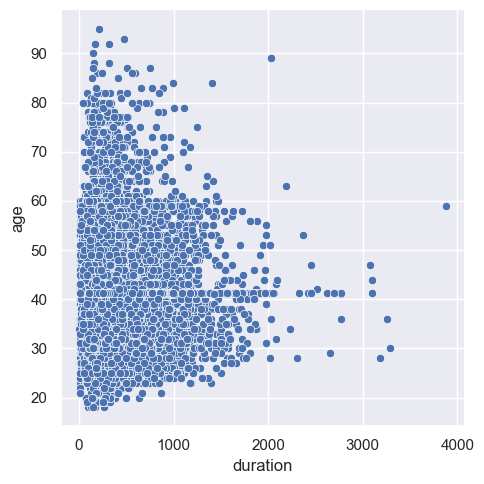

In [130]:
sns.relplot(data=df, x='duration',y='age',kind='scatter')

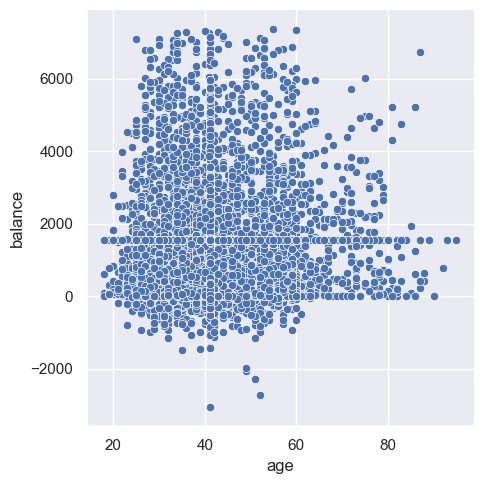

In [131]:
sns.relplot(data=df, x='age',y='balance',kind='scatter')

<Axes: xlabel='age', ylabel='Count'>

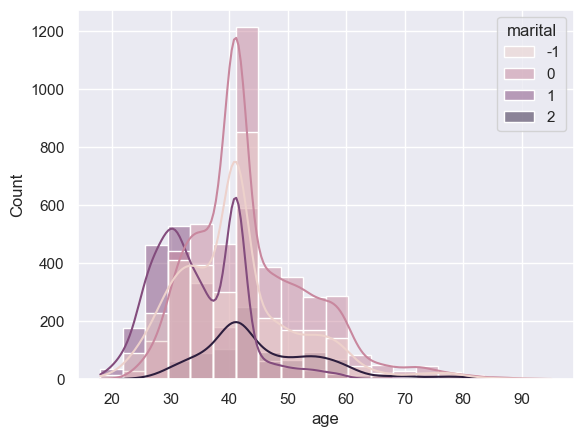

In [132]:
sns.histplot(data=df, x='age', hue="marital", bins=20, kde=True, color="m")

In [133]:
rs = np.random.RandomState(21)

test = rs.choice(df.index, len(df) // 4)
train = df.index[~df.index.isin(test)]

print(test)
print(train)

[5502 6126 9229 ... 7386 4066 8010]
Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,    10,
       ...
       11150, 11151, 11152, 11153, 11154, 11155, 11156, 11159, 11160, 11161],
      dtype='int64', length=8478)


In [134]:
df.loc[train, 'subset'] = 'Train'
df.loc[test, 'subset'] = 'Test'
dfTrain = df[df['subset'] == 'Train']
dfTest = df[df['subset'] == 'Test']
df.groupby('subset').count()[['age']]

age
subset      
Test    2379
Train   8478

In [135]:
df[df.subset=='Test']

age  marital  education      balance  day  month  duration  \
8      37.000000       -1         -1  1547.403549    6      5       608   
15     35.000000       -1         -1  3837.000000    8      5      1084   
20     28.000000        2          2   785.000000    8      5       442   
24     37.000000        1          1   381.000000    8      5       985   
26     31.000000        1          1    22.000000    9      5       483   
...          ...      ...        ...          ...  ...    ...       ...   
11140  55.000000       -1         -1  2166.000000   28      5        23   
11141  32.000000        0          0   130.000000    6      5       302   
11142  52.000000        2          2    48.000000   17     11       591   
11157  41.199408        1          1  1547.403549   20      4       257   
11158  39.000000        0          0  1547.403549   16      6        83   

       campaign  pdays  previous  deposit subset  
8           1.0   -1.0       0.0     True   Test  
15          1.0   -1.0       0.0     True   Test  
20          2.0   -1.0       0.0     True   Test  
24          2.0   -1.0       0.0     True   Test  
26          3.0   -1.0       0.0     True   Test  
...         ...    ...       ...      ...    ...  
11140      17.0   -1.0       0.0    False   Test  
11141       2.0   -1.0       0.0    False   Test  
11142       1.0   -1.0       0.0    False   Test  
11157       1.0   -1.0       0.0    False   Test  
11158       4.0   -1.0       0.0    False   Test  

[2379 rows x 12 columns]

In [136]:
long = df.melt(id_vars=['age'], 
    value_vars=['balance', 'duration', 'marital'])
long[:10]

age variable        value
0  41.199408  balance  2343.000000
1  41.199408  balance    45.000000
2  41.000000  balance  1270.000000
3  41.199408  balance  2476.000000
4  54.000000  balance   184.000000
5  42.000000  balance     0.000000
6  41.199408  balance   830.000000
7  60.000000  balance   545.000000
8  37.000000  balance  1547.403549
9  28.000000  balance  5090.000000

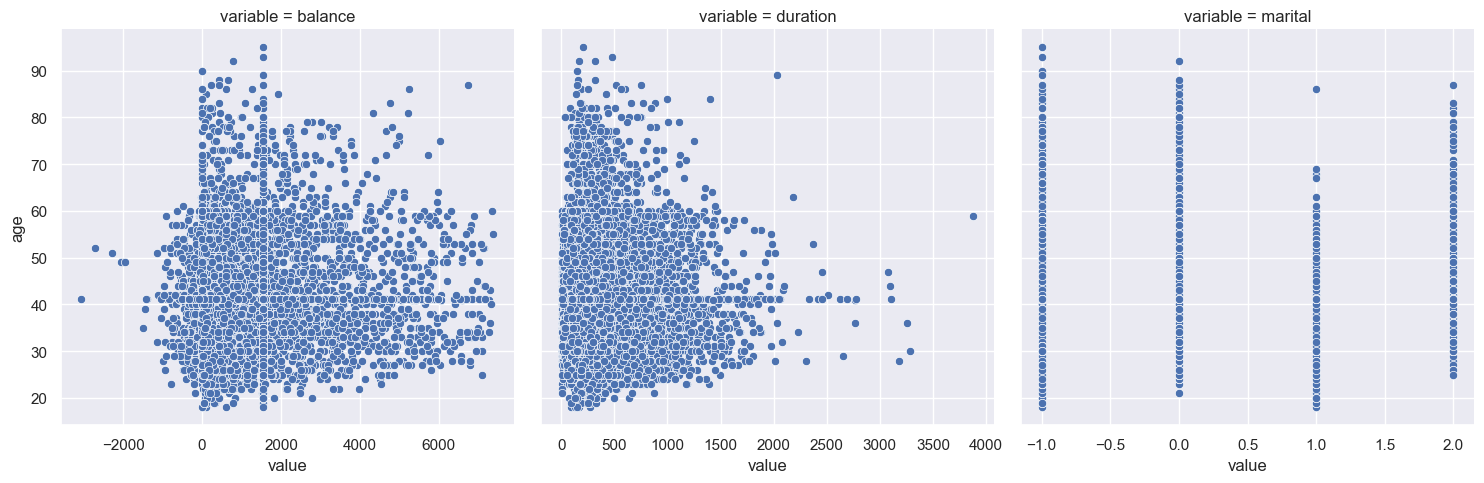

In [137]:
sns.relplot(data=long, x='value', y='age', col='variable', 
    facet_kws={'sharex': False})

In [138]:
def addBiasTerm(x):
    # Return a new array of given shape and type, filled with ones.
    b = np.ones((len(x), 1)) 
    ## Stack arrays in sequence horizontally (column wise).
    x = np.hstack([b, x]) 
    return x

In [139]:
xTrain = dfTrain[['age']].values
xTrain = addBiasTerm(xTrain)
yTrain = dfTrain[['balance']].values
xTrain.shape, yTrain.shape

((8478, 2), (8478, 1))

In [140]:
xTrain[:3], yTrain[:3]

(array([[ 1.        , 41.19940781],
        [ 1.        , 41.19940781],
        [ 1.        , 41.        ]]),
 array([[2343.],
        [  45.],
        [1270.]]))

In [141]:
beta = lambda x, y: np.linalg.pinv(x.T @ x) @ x.T @ y
betaTrain = beta(xTrain, yTrain)
betaTrain

array([[835.58599324],
       [  8.79120604]])

In [142]:
RSS = lambda x, y, beta: np.transpose(y - x @ beta) @ (y - x @ beta)
RSS(xTrain, yTrain, betaTrain)

array([[1.3652252e+10]])

In [143]:
MSE = lambda x, y, b: (RSS(x, y, b) / len(x)).item()
errTrain = MSE(xTrain, yTrain, betaTrain)
errTrain

1610315.1653688792

In [144]:
xTest = dfTrain[['age']].values
xTest = addBiasTerm(xTest)
yTest = dfTrain[['balance']].values
xTest.shape, yTest.shape

((8478, 2), (8478, 1))

In [145]:
def predict(xAxis, beta):
    x = np.linspace(xAxis.min(), xAxis.max())
    b = np.ones(len(x))
    # Stack arrays in sequence vertically (row wise).
    X = np.vstack([b, x]).T
    yHat = X @ beta
    yHat = yHat.flatten()
    return pd.DataFrame({'x': x, 'y': yHat})

In [146]:
yHat = predict(df['age'], betaTrain)
yHat.shape

(50, 2)

In [147]:
yHat[:5]

x            y
0  18.000000   993.827702
1  19.571429  1007.642454
2  21.142857  1021.457207
3  22.714286  1035.271959
4  24.285714  1049.086711

Text(0, 0.5, 'Balance $')

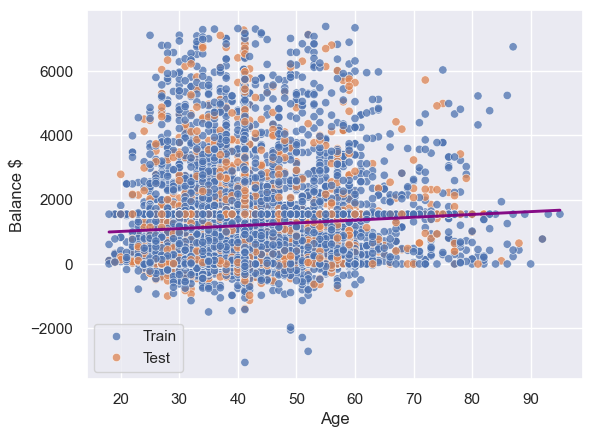

In [148]:
sns.scatterplot(data=df, x='age', y='balance',
    hue='subset', alpha=0.75, hue_order=['Train', 'Test'])
sns.lineplot(data=yHat, x='x', y='y', alpha=0.95, color="purple", linewidth=2.1)

plt.xlabel('Age')
plt.ylabel('Balance $')

In [149]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression()
linearRegModel.fit(xTrain, yTrain)

LinearRegression()

In [150]:
linearRegModel.coef_

array([[0.        , 8.79120604]])

In [151]:
linearRegModel.intercept_

array([835.58599324])

In [152]:
yHat = linearRegModel.predict(xTest)
yHat[0:5]

array([[1197.77847599],
       [1197.77847599],
       [1196.02544082],
       [1197.77847599],
       [1310.31111932]])

In [153]:
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
mean_squared_error(yTest, yHat)

1610315.1653688813

In [155]:
r2_score(yTest, yHat)

0.005253452881494813

In [156]:
linearRegModel.score(xTest, yTest)

0.005253452881494813

In [157]:
reg = np.polyfit(df.age, df.balance, deg=1)
reg

array([  8.93618027, 835.59071105])

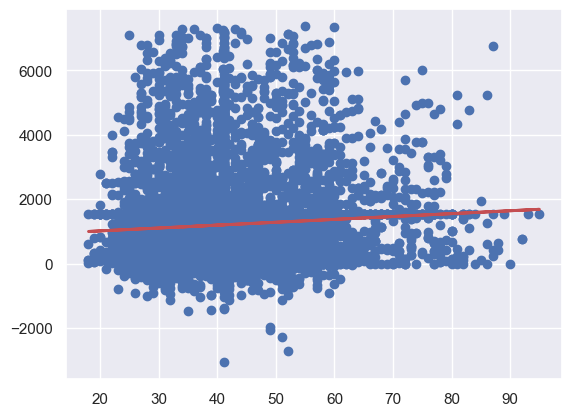

In [158]:
trend = np.polyval(reg, df.age)
plt.scatter(df.age, df.balance)
plt.plot(df.age, trend, 'r',  linewidth=2.1)

<Axes: xlabel='age', ylabel='balance'>

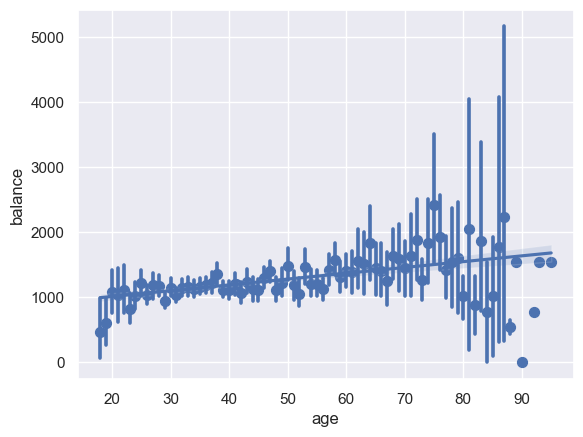

In [159]:
sns.regplot(data=df, x='age', y='balance', 
            x_estimator=np.mean)

In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
np.random.seed(21)
x = 2 - 3 * np.random.normal(0, 1, 500)
y = x - 1 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 500)

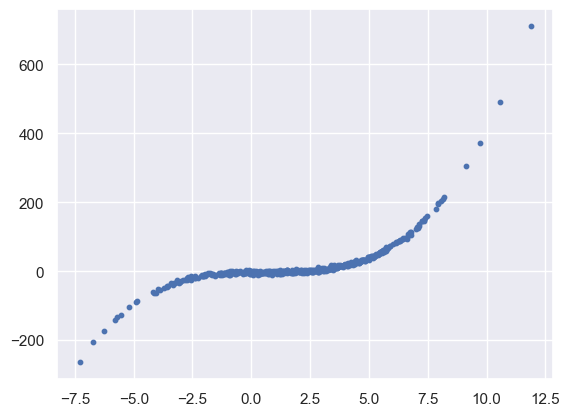

In [162]:
plt.scatter(x, y, s=10)

In [163]:
polyFeatures = PolynomialFeatures(degree=3)

In [164]:
x_poly = polyFeatures.fit_transform(x.reshape(-1, 1))

In [165]:
polyRegModel = LinearRegression()

In [166]:
polyRegModel.fit(x_poly, y)

LinearRegression()

In [167]:
y_poly_hat = polyRegModel.predict(x_poly)

In [168]:
rmse = np.sqrt(mean_squared_error(y, y_poly_hat))
rmse

2.9439884257726976

In [169]:
r2 = r2_score(y, y_poly_hat)
r2

0.9977704721632059

In [170]:
print(rmse)
print(r2)

2.9439884257726976
0.9977704721632059


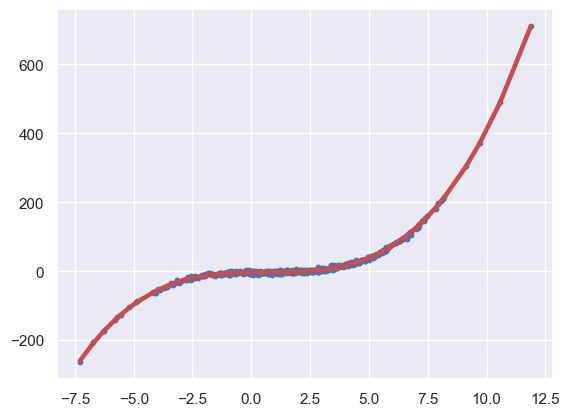

In [171]:
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_hat), key=sort_axis)
x, y_poly_hat = zip(*sorted_zip)
plt.plot(x, y_poly_hat, color='r', linewidth=3.3)
plt.show()